In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_file(filename):
    names, errors, shape = [], [], []
    with open(filename, 'r') as file:
        for line in file:
            # Split the line into its components using whitespace as the delimiter
            parts = line.strip().split()
            # Extract the "name", "val1", and "val2" from the parts list
            names.append(parts[0])
            errors.append(float(parts[1]))
            shape.append(float(parts[2]))
    return names, errors, shape

def checkNumVar(codeNum, varNum):
    # varNum: 1-6, codeNum: 0-63
    for i in range(varNum):
        out = int(codeNum%2)
        codeNum = int(codeNum/2)
    return out


def getCodeNumsWithVars(vars):
    codeNums = []
    for i in range(64):
        lst = []
        for v in vars:
            lst.append(checkNumVar(i, v))
        if (all(num == 1 for num in lst)):
            codeNums.append(i)
    return codeNums


def getCodeNumsNumVars(numVars):
    codeNums = []
    for i in range(64):
        lst = []
        for v in range(1, 7):
            lst.append(checkNumVar(i, v))
        if (sum(lst) == numVars):
            codeNums.append(i)
    return codeNums

In [3]:
arrs = read_file("evaluationAllVars.out")
print(len(arrs[0]), len(arrs))
reco_names, reco_errors, reco_shape = [], [], []
none_names, none_errors, none_shape = [], [], []
nonorm_names, nonorm_errors, nonorm_shape = [], [], []
oneVar_names, oneVar_errors, oneVar_shape = [], [], []
twoVar_names, twoVar_errors, twoVar_shape = [], [], []
threeVar_names, threeVar_errors, threeVar_shape = [], [], []
fourVar_names, fourVar_errors, fourVar_shape = [], [], []
mixed23_names, mixed23_errors, mixed23_shape = [], [], []
for n, e, s in zip(arrs[0], arrs[1], arrs[2]):
    if n == "RECO":
        reco_names.append(n)
        reco_errors.append(e)
        reco_shape.append(s)
    elif n.count("NONE") == 1:
        none_names.append(n)
        none_errors.append(e)
        none_shape.append(s)
    elif n.count("NoNorm") == 1:
        nonorm_names.append(n)
        nonorm_errors.append(e)
        nonorm_shape.append(s)
    elif n.count("mixed_23") == 1:
        mixed23_names.append(n)
        mixed23_errors.append(e)
        mixed23_shape.append(s)
    elif n.count("var") == 1:
        oneVar_names.append(n)
        oneVar_errors.append(e)
        oneVar_shape.append(s)
    elif n.count("var") == 2:
        twoVar_names.append(n)
        twoVar_errors.append(e)
        twoVar_shape.append(s)
    elif n.count("var") == 3:
        threeVar_names.append(n)
        threeVar_errors.append(e)
        threeVar_shape.append(s)
    elif n.count("var") == 4:
        fourVar_names.append(n)
        fourVar_errors.append(e)
        fourVar_shape.append(s)
print(len(reco_errors), len(none_errors), len(nonorm_errors), len(oneVar_errors), len(twoVar_errors), len(threeVar_errors), len(fourVar_errors), len(mixed23_errors), len(reco_errors) + len(none_errors) + len(nonorm_errors) + len(oneVar_errors) + len(twoVar_errors) + len(threeVar_errors) + len(fourVar_errors) + len(mixed23_errors))

26677 3
1 1 64 110 5995 9880 10626 26677


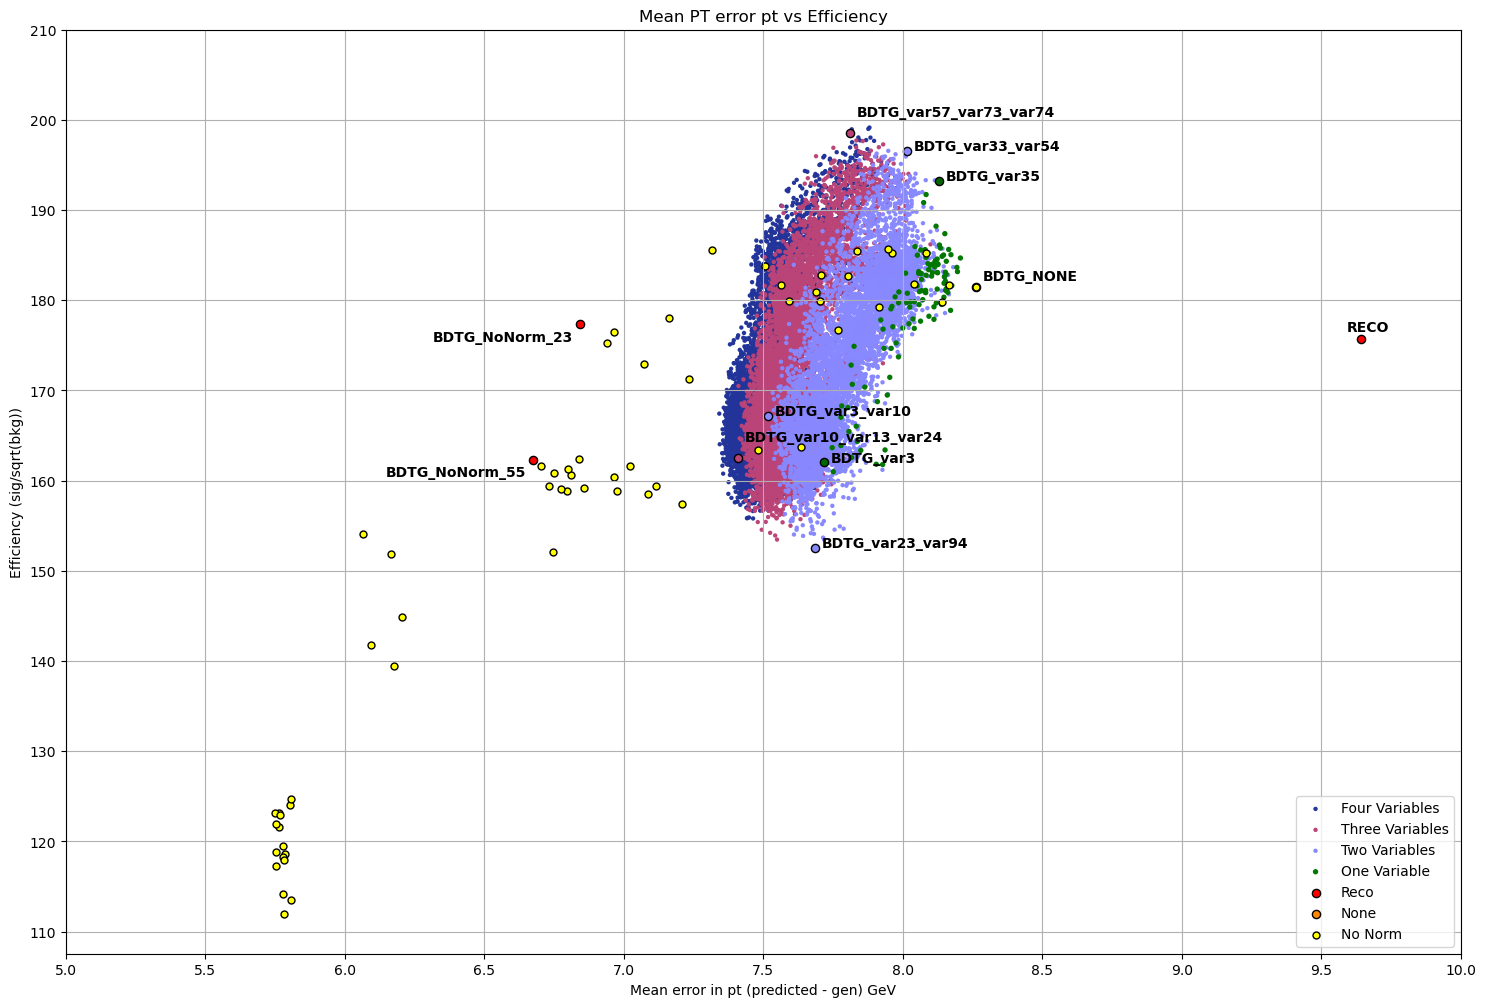

BDTG_NoNorm_62 5.750415802001953 123.12486281584181
One var:	8.03412882197987	178.8889140805786
Two vars:	7.808921806567703	174.25596353556853
Three vars:	7.596537175159223	170.8532599189717


In [4]:
x = np.linspace(7.4, 8.1, 10)

def linfunc(x):
    return x*62 - 292

def linfunc3(x):
    return x*65 - 310

plt.figure(figsize=(18, 12))
plt.scatter(fourVar_errors, fourVar_shape, color="#223399", s=10, label='Four Variables', alpha=0.99, edgecolor="none")
plt.scatter(threeVar_errors, threeVar_shape, color="#bb4477", s=10, label='Three Variables', alpha=0.99, edgecolor="none")
plt.scatter(twoVar_errors, twoVar_shape, color="#8888ff", s=10, label='Two Variables', alpha=0.99, edgecolor="none")
plt.scatter(oneVar_errors, oneVar_shape, color="#007700", s=15, label='One Variable', alpha=0.99, edgecolor="none")
plt.scatter(reco_errors, reco_shape, color="#ff0000", label='Reco', s=35, alpha=1.0, edgecolor="#000000")
plt.scatter(none_errors, none_shape, color="#ff8800", label='None', s=35, alpha=1.0, edgecolor="#000000")
plt.scatter(nonorm_errors, nonorm_shape, color="#ffff00", label='No Norm', s=25, alpha=1.0, edgecolor="#000000")

#plt.plot(x, linfunc3(x), color="#ff0000")
for i, label in enumerate(reco_names):
    plt.annotate(label, (reco_errors[i], reco_shape[i]), textcoords="offset points", xytext=(5,5), ha='center', weight='bold')
for i, label in enumerate(none_names):
    plt.annotate(label, (none_errors[i], none_shape[i]), textcoords="offset points", xytext=(5,5), ha='left', weight='bold')

for i, label in enumerate(nonorm_names):
    if ((label not in ["BDTG_NoNorm_"+str(code) for code in getCodeNumsWithVars([4])]) and (label in ["BDTG_NoNorm_"+str(code) for code in getCodeNumsWithVars([1,2,3,5])] )):
        plt.annotate(label, (nonorm_errors[i], nonorm_shape[i]), textcoords="offset points", xytext=(-5,-12), ha='right', weight='bold')
        plt.scatter(nonorm_errors[i], nonorm_shape[i], color="#ff0000", s=35, alpha=1.0, edgecolor="#000000")

for i, label in enumerate(oneVar_names):
    if (oneVar_shape[i] > 192 or oneVar_errors[i] < 7.74):
        plt.annotate(label, (oneVar_errors[i], oneVar_shape[i]), textcoords="offset points", xytext=(5,0), ha='left', weight='bold')
        plt.scatter(oneVar_errors[i], oneVar_shape[i], color="#006600", s=35, alpha=1.0, edgecolor="#000000")
for i, label in enumerate(twoVar_names):
    if (twoVar_shape[i] > 196.58 or twoVar_errors[i] < 7.517 or twoVar_shape[i] < 153):
        plt.annotate(label, (twoVar_errors[i], twoVar_shape[i]), textcoords="offset points", xytext=(5,0), ha='left', weight='bold')
        plt.scatter(twoVar_errors[i], twoVar_shape[i], color="#8888ff", s=35, alpha=1.0, edgecolor="#000000")
for i, label in enumerate(threeVar_names):
    if (threeVar_shape[i] > 198 or threeVar_errors[i] < 7.41 or threeVar_shape[i] < 153):
        plt.annotate(label, (threeVar_errors[i], threeVar_shape[i]), textcoords="offset points", xytext=(5,12), ha='left', weight='bold')
        plt.scatter(threeVar_errors[i], threeVar_shape[i], color="#bb4477", s=35, alpha=1.0, edgecolor="#000000")

'''
for n, e, s in zip(arrs[0], arrs[1], arrs[2]):
    if n.count("var21") > 0:
        plt.scatter(e, s, color="#ff0000", s=15, alpha=0.5)
    if n.count("var32") > 0:
        plt.scatter(e, s, color="#ffff00", s=15, alpha=0.5)'''


plt.xlabel('Mean error in pt (predicted - gen) GeV')
plt.ylabel('Efficiency (sig/sqrt(bkg))')
plt.title('Mean PT error pt vs Efficiency')
xmin, xmax, xsep = 5, 10, 0.5
ymin, ymax, ysep = 110, 210, 10
#plt.xlim(xmin, xmax)
#plt.ylim(ymin, ymax)
plt.yticks(np.arange(ymin, ymax+0.1, ysep))
plt.xticks(np.arange(xmin, xmax+0.1, xsep))
plt.grid()
plt.legend(loc='lower right')
plt.show()
print(arrs[0][np.argmin(arrs[1])], arrs[1][np.argmin(arrs[1])], arrs[2][np.argmin(arrs[1])])
print("One var:\t{}\t{}".format(np.mean(oneVar_errors), np.mean(oneVar_shape)))
print("Two vars:\t{}\t{}".format(np.mean(twoVar_errors), np.mean(twoVar_shape)))
print("Three vars:\t{}\t{}".format(np.mean(threeVar_errors), np.mean(threeVar_shape)))

In [165]:
nBest = 6

oneVar_errors_np = np.array(oneVar_errors)
oneVar_names_np = np.array(oneVar_names)
oneVar_shape_np = np.array(oneVar_shape)

lowest_errors_oneVar = np.argsort(oneVar_errors_np)[:nBest]
lowNames_oneVar = np.asarray([x.split("_")[1] for x in oneVar_names_np[lowest_errors_oneVar]])
print(lowNames_oneVar)

highest_shape_oneVar = np.argsort(oneVar_shape_np)[::-1][:nBest]
highNames_oneVar = np.asarray([x.split("_")[1] for x in oneVar_names_np[highest_shape_oneVar]])
print(highNames_oneVar)

combinedVars_oneVar = list(set(lowNames_oneVar).union(set(highNames_oneVar)))
print(len(combinedVars_oneVar))

nBest = 2

twoVar_errors_np = np.array(twoVar_errors)
twoVar_names_np = np.array(twoVar_names)
twoVar_shape_np = np.array(twoVar_shape)

lowest_errors_twoVar = np.argsort(twoVar_errors_np)[:nBest]
lowNames_twoVar = np.asarray([x.split("_")[1] for x in twoVar_names_np[lowest_errors_twoVar]] + [x.split("_")[2] for x in twoVar_names_np[lowest_errors_twoVar]])
print(lowNames_twoVar, len(set(lowNames_twoVar)))

highest_shape_twoVar = np.argsort(twoVar_shape_np)[::-1][:nBest]
highNames_twoVar = np.asarray([x.split("_")[1] for x in twoVar_names_np[highest_shape_twoVar]] + [x.split("_")[2] for x in twoVar_names_np[highest_shape_twoVar]])
print(highNames_twoVar, len(set(highNames_twoVar)))

diagNames = []
for n, e, s in zip(twoVar_names_np, twoVar_errors_np, twoVar_shape_np):
    if s > linfunc(e)-0.8:
        diagNames.append(n)
diagNames = np.asarray([x.split("_")[1] for x in diagNames] + [x.split("_")[2] for x in diagNames])

print(diagNames, len(set(diagNames)))

combinedVars_twoVar = list(set(lowNames_twoVar).union(set(highNames_twoVar)).union(set(diagNames)))
print(len(combinedVars_twoVar))


nBest = 1

threeVar_errors_np = np.array(threeVar_errors)
threeVar_names_np = np.array(threeVar_names)
threeVar_shape_np = np.array(threeVar_shape)

lowest_errors_threeVar = np.argsort(threeVar_errors_np)[:nBest]
lowNames_threeVar = np.asarray([x.split("_")[1] for x in threeVar_names_np[lowest_errors_threeVar]] + [x.split("_")[2] for x in threeVar_names_np[lowest_errors_threeVar]] + [x.split("_")[3] for x in threeVar_names_np[lowest_errors_threeVar]])
print(lowNames_threeVar, len(set(lowNames_threeVar)))

highest_shape_threeVar = np.argsort(threeVar_shape_np)[::-1][:nBest]
highNames_threeVar = np.asarray([x.split("_")[1] for x in threeVar_names_np[highest_shape_threeVar]] + [x.split("_")[2] for x in threeVar_names_np[highest_shape_threeVar]] + [x.split("_")[3] for x in threeVar_names_np[highest_shape_threeVar]])
print(highNames_threeVar, len(set(highNames_threeVar)))

diagNames = []
for n, e, s in zip(threeVar_names_np, threeVar_errors_np, threeVar_shape_np):
    if s > linfunc3(e)+6:
        diagNames.append(n)
diagNames = np.asarray([x.split("_")[1] for x in diagNames] + [x.split("_")[2] for x in diagNames])

print(diagNames, len(set(diagNames)))

combinedVars_threeVar = list(set(lowNames_threeVar).union(set(highNames_threeVar)).union(set(diagNames)))
print(len(combinedVars_threeVar))

combinedVars_onetwothreeVar = sorted([int(x[3:]) for x in list(set(combinedVars_oneVar).union(set(combinedVars_twoVar)).union(set(combinedVars_threeVar)))])
print(len(combinedVars_onetwothreeVar))
print(combinedVars_onetwothreeVar)

['var3' 'var25' 'var16' 'var98' 'var31' 'var2']
['var35' 'var74' 'var85' 'var97' 'var44' 'var57']
12
['var3' 'var10' 'var10' 'var24'] 3
['var33' 'var13' 'var54' 'var97'] 4
['var19' 'var19' 'var33' 'var57' 'var70' 'var74' 'var75' 'var74' 'var75'
 'var75' 'var75' 'var74' 'var91' 'var91'] 7
13
['var10' 'var13' 'var24'] 3
['var57' 'var73' 'var74'] 3
['var15' 'var33' 'var33' 'var34' 'var35' 'var34' 'var74' 'var57'] 6
10
24
[2, 3, 10, 13, 15, 16, 19, 24, 25, 31, 33, 34, 35, 44, 54, 57, 70, 73, 74, 75, 85, 91, 97, 98]
